# Decision Tree Regression 

### Use 50 Startups dataset

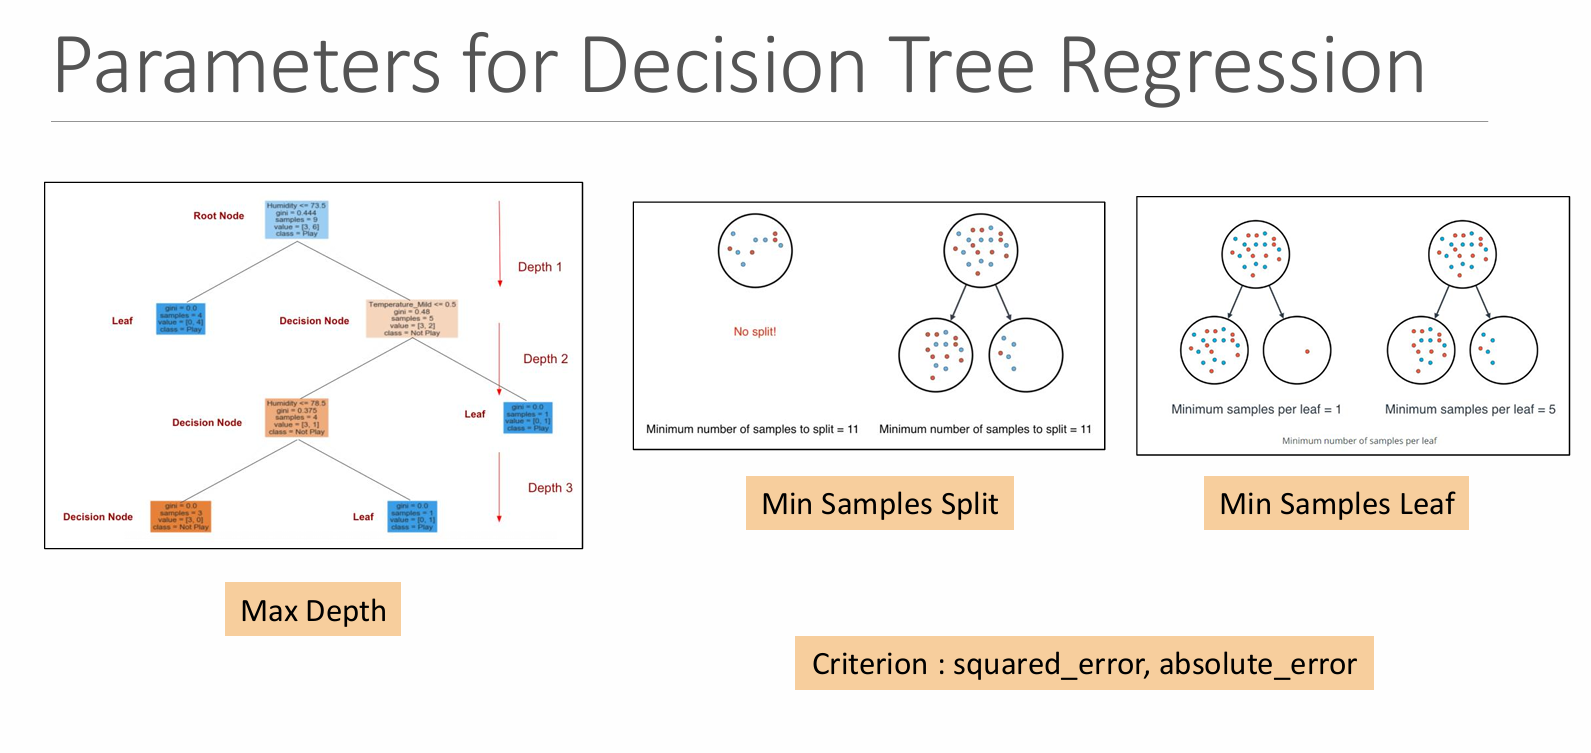

In [23]:
from warnings import filterwarnings
filterwarnings('ignore')

In [24]:
import pandas as pd
df = pd.read_csv('Datasets/50_Startups.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [25]:
X = df.drop(columns=['Profit'])
Y = df[['Profit']]
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [26]:
Y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [27]:
# seperate cat,con features
from PM6func import catconsep
cat, con = catconsep(X)
cat

['State']

In [28]:
con

['R&D Spend', 'Administration', 'Marketing Spend']

In [29]:
# preprocess data
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])
cat_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
                           ('ohe',OneHotEncoder(handle_unknown='ignore'))])
pre = ColumnTransformer([('num',num_pipe,con),
                         ('cat',cat_pipe,cat)])
pre

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [30]:
X_pre = pre.fit_transform(X)
X_pre

array([[ 2.01641149e+00,  5.60752915e-01,  2.15394309e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.95586034e+00,  1.08280658e+00,  1.92360040e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.75436374e+00, -7.28257028e-01,  1.62652767e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.55478369e+00, -9.63646307e-02,  1.42221024e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.50493720e+00, -1.07991935e+00,  1.28152771e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.27980001e+00, -7.76239071e-01,  1.25421046e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.34006641e+00,  9.32147208e-01, -6.88149930e-01,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.24505666e+00,  8.71980011e-01,  9.32185978e-01,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.03036886e+00,  9.86952101e-01,  8.308

In [ ]:
cols = pre.get_feature_names_out()
cols

array(['num__R&D Spend', 'num__Administration', 'num__Marketing Spend',
       'cat__State_California', 'cat__State_Florida',
       'cat__State_New York'], dtype=object)

In [33]:
X_pre = pd.DataFrame(X_pre,columns=[cols])
X_pre.head()

,num__R&D Spend,num__Administration,num__Marketing Spend,cat__State_California,cat__State_Florida,cat__State_New York
0,2.016411,0.560753,2.153943,0.0,0.0,1.0
1,1.955860,1.082807,1.923600,1.0,0.0,0.0
2,1.754364,-0.728257,1.626528,0.0,1.0,0.0
3,1.554784,-0.096365,1.422210,0.0,0.0,1.0
4,1.504937,-1.079919,1.281528,0.0,1.0,0.0


## train test split

In [34]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre,Y, test_size=0.2, random_state=21)
xtrain.shape

(40, 6)

In [35]:
xtest.shape

(10, 6)

## Train Decision tree model

In [38]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=3,min_samples_split=5,min_samples_leaf=6,criterion='squared_error')
model.fit(xtrain,ytrain)

,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,5
,min_samples_leaf,6
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [42]:
model.score(xtrain,ytrain)

0.8884547251597601

In [43]:
model.score(xtest,ytest)

0.9245725555888615

## Hyperparameter Tuning

In [44]:
params = {
    'max_depth':[1,2,3,4,5,6,7,8],
    'min_samples_split':[5,6,7,8,9,10],
    'min_samples_leaf':[3,4,5,6,7,8,9],
    'criterion':['squared_error','absolute_error']
}

In [45]:
from sklearn.model_selection import GridSearchCV
dtr = DecisionTreeRegressor()
gscv = GridSearchCV(dtr, param_grid=params, cv=5, scoring='neg_mean_squared_error')
gscv.fit(xtrain,ytrain)

,estimator,DecisionTreeRegressor()
,param_grid,"{'criterion': ['squared_error', 'absolute_error'], 'max_depth': [1, 2, ...], 'min_samples_leaf': [3, 4, ...], 'min_samples_split': [5, 6, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'absolute_error'


In [46]:
gscv.best_params_

{'criterion': 'absolute_error',
 'max_depth': 6,
 'min_samples_leaf': 3,
 'min_samples_split': 6}

In [47]:
gscv.best_score_

np.float64(-288289828.9613643)

In [49]:
best_dtr= gscv.best_estimator_
best_dtr

,criterion,'absolute_error'
,splitter,'best'
,max_depth,6
,min_samples_split,6
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [51]:
best_dtr.score(xtrain,ytrain)

0.964491148172637

In [52]:
best_dtr.score(xtest,ytest)

0.9397388817493316

### predict the result

In [53]:
ypred_tr = best_dtr.predict(xtrain)
ypred_ts =best_dtr.predict(xtest)

In [54]:
ypred_tr[0:5]

array([ 96778.92, 111313.02, 111313.02, 141585.52, 105008.31])

In [55]:
ytrain.head()

,Profit
30,99937.59
21,111313.02
19,122776.86
11,144259.40
22,110352.25


In [56]:
ypred_ts[0:5]

array([156122.51,  78019.37,  78019.37, 105008.31, 156122.51])

In [58]:
ytest.head()

,Profit
7,155752.60
44,65200.33
43,69758.98
25,107404.34
14,132602.65


In [59]:
from PM6func import evaluate_model
evaluate_model(xtrain,xtest,ytrain,ytest,best_dtr)

Metrics of Train Data
MSE: 54847052.08
MAE: 4473.23
RMSE: 7405.88
R2: 0.96


Metrics of Test Data
MSE: 106948230.95
MAE: 6877.47
RMSE: 10341.58
R2: 0.94


## Plotting Decision tree

In [67]:
best_dtr

,criterion,'absolute_error'
,splitter,'best'
,max_depth,6
,min_samples_split,6
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


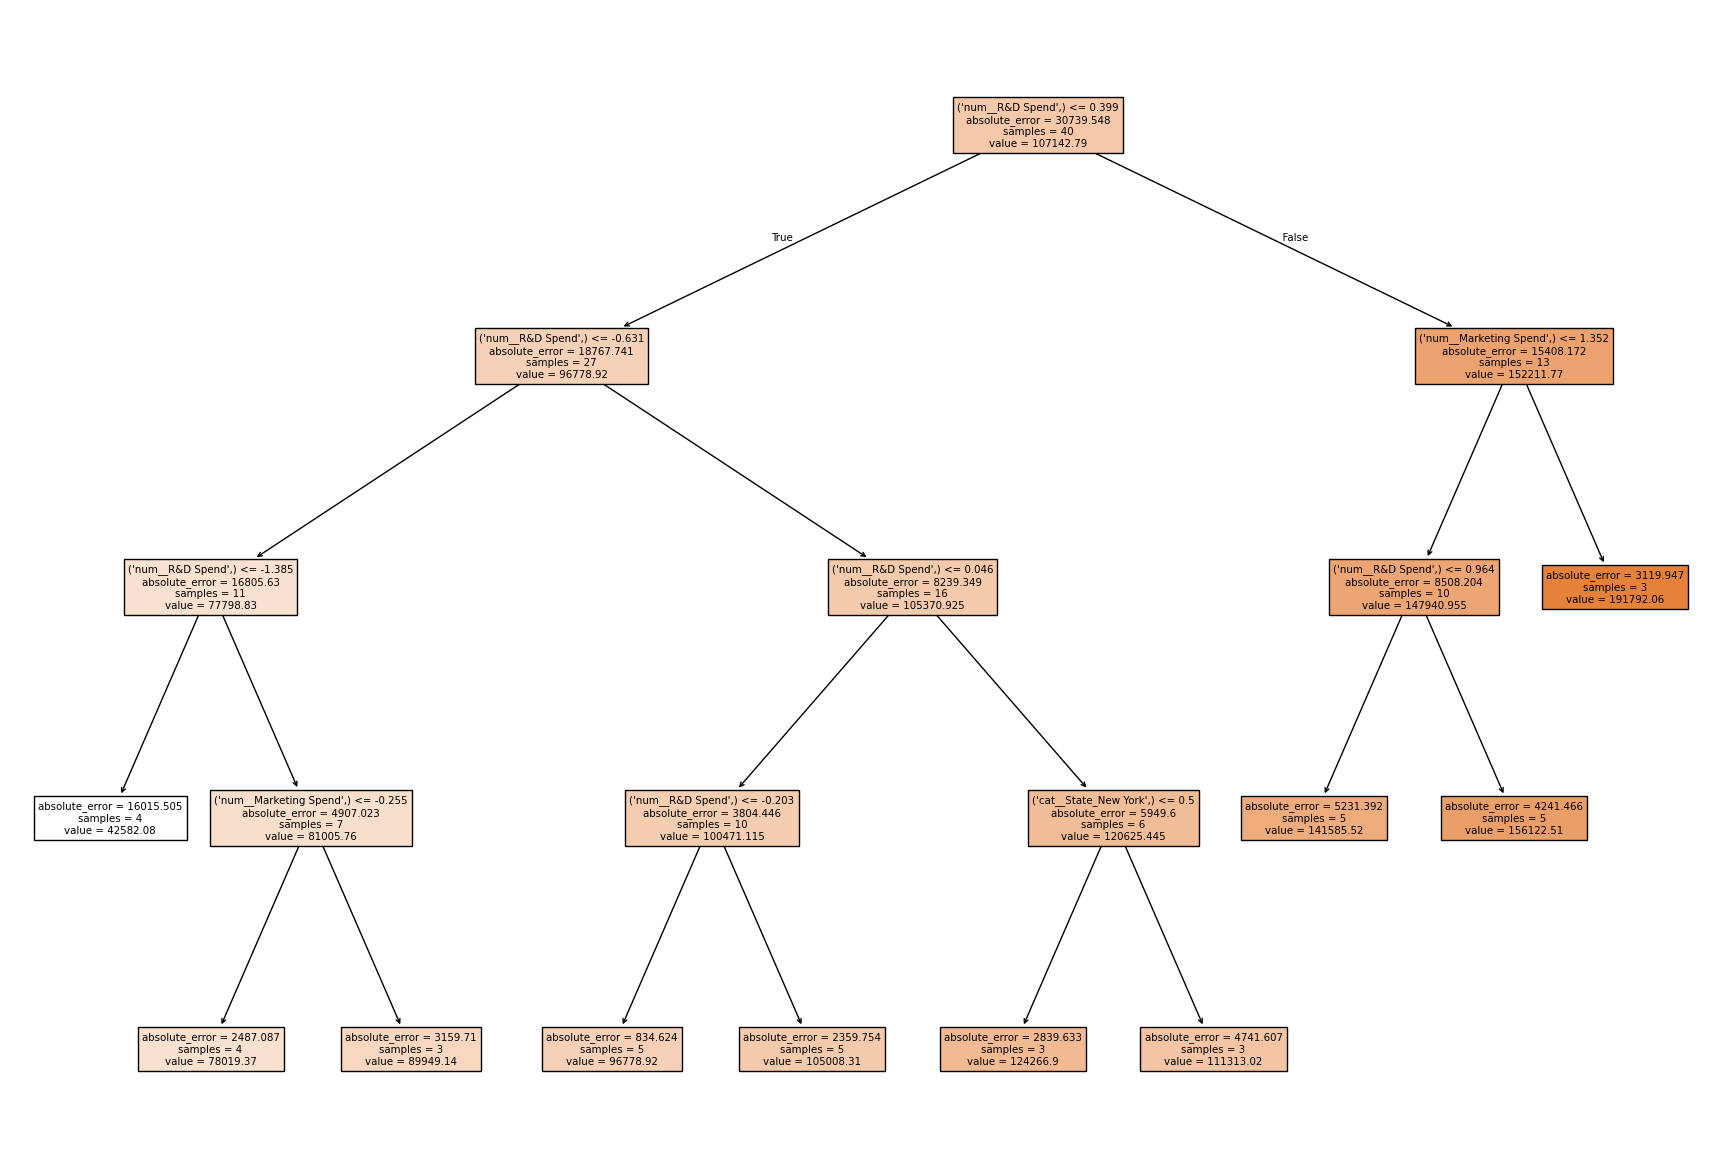

In [68]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(22,15))
plot_tree(best_dtr, feature_names=xtrain.columns, filled=True)
plt.show()

In [69]:
imp = best_dtr.feature_importances_
imp

array([0.87270778, 0.        , 0.11496285, 0.        , 0.        ,
       0.01232936])

In [71]:
imp = pd.Series(imp)
imp

0    0.872708
1    0.000000
2    0.114963
3    0.000000
4    0.000000
5    0.012329
dtype: float64

In [77]:
imp.index = X_pre.columns
imp = imp.sort_values(ascending=False)
imp

num__R&D Spend           0.872708
num__Marketing Spend     0.114963
cat__State_New York      0.012329
num__Administration      0.000000
cat__State_California    0.000000
cat__State_Florida       0.000000
dtype: float64

<Axes: title={'center': 'Feature Importance'}>

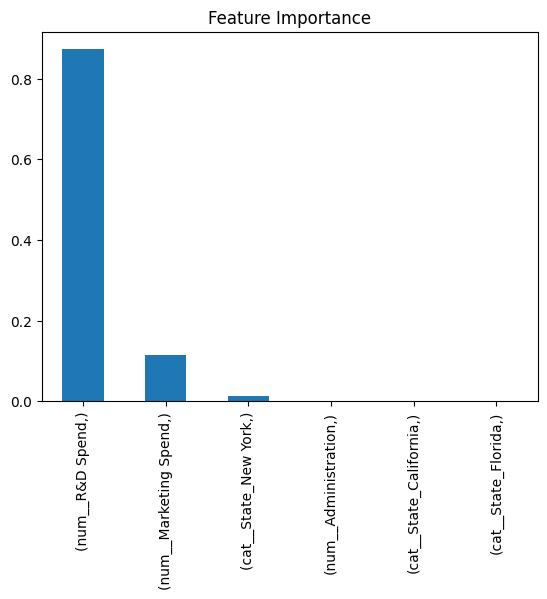

In [79]:
imp.plot(kind='bar',title='Feature Importance')